In [0]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
url = "http://insideairbnb.com/get-the-data.html"
response = urlopen(url)
html = BeautifulSoup(response)

In [0]:
from urllib.request import urlretrieve
tables = html.find_all("table")
regions = html.find_all("h2")
for (i, t) in enumerate(tables):
    r = regions[i].text
    body = t.find("tbody")
    row = body.find_all("tr")[3]
    country = row.find_all("td")[1].text
    listing = row.find_all("td")[2].find("a")["href"]
    if "United States" in r:
        print(country, listing)
        fname = country + ".csv"
        try:
            urlretrieve(listing, fname)
        except:
            print("跳過")

In [0]:
import glob
import pandas as pd
total_df = pd.DataFrame()
for fn in glob.glob("*.csv"):
    country = fn.split(".")[0]
    df1 = pd.read_csv(fn, encoding="utf-8")
    # 如果整行設同一個值
    df1["country"] = country
    # 連接兩個df, 橫的或直的連(AXIS)
    total_df = pd.concat([total_df, df1], ignore_index=True)
total_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,country
0,2441,"Cozy Artist’s Abode, ENTIRE Home-Wifi,NetFlix +",2680,Emily,NaN,Hennepin,45.00886,-93.23407,Entire home/apt,85,2,212,2019-02-28,1.81,2,165,Twin Cities MSA
1,4534,"Charming, 1 or 2BR + private bath, near downtown",5811,Rachel,NaN,Hennepin,44.94566,-93.35721,Private room,54,2,150,2019-04-24,1.37,1,363,Twin Cities MSA
2,27319,"Parks, Lakes, Downtown, Light rail",117283,Keith,NaN,Hennepin,44.91878,-93.23038,Private room,54,2,166,2019-05-05,1.57,2,341,Twin Cities MSA
3,55089,"Minneapolis/Edina ""Cabin"" on Creek",238546,Leslie,NaN,Hennepin,44.92053,-93.35049,Entire home/apt,150,2,26,2018-11-26,0.31,2,335,Twin Cities MSA
4,60977,Attic Loft with organic breakfast,294621,Habib,NaN,Ramsey,44.94800,-93.19037,Entire home/apt,65,3,20,2016-08-07,0.21,1,0,Twin Cities MSA
5,67872,MPLS Metro Lakeside Summer Rental,209634,Mike And Maria,NaN,Washington,45.05694,-92.96061,Entire home/apt,385,14,2,2012-07-22,0.02,2,365,Twin Cities MSA
6,68981,Guest Room,111098,Justin,NaN,Hennepin,44.90730,-93.31865,Private room,170,1,0,NaN,NaN,1,365,Twin Cities MSA
7,82439,Rest and Rehearsal Space,117283,Keith,NaN,Hennepin,44.92136,-93.22873,Private room,54,2,15,2018-09-14,0.16,2,340,Twin Cities MSA
8,101034,★ParkFront ★ Walk 2 Downtown ★ Bike Score 98★,529956,MPLSvr Angie,NaN,Hennepin,44.98773,-93.25060,Entire home/apt,457,1,88,2019-03-30,1.04,9,261,Twin Cities MSA
9,101076,Minneapolis Gem of a Duplex,529956,MPLSvr Angie,NaN,Hennepin,44.98763,-93.21948,Entire home/apt,89,30,1,2011-08-30,0.01,9,283,Twin Cities MSA


In [0]:
from google.colab import files
# 儲存檔案
total_df.to_csv("total.csv", encoding="utf-8", index=False)
files.download('total.csv')

In [0]:
# 行操作: [行名字]
total_df["country"].unique()

array(['Twin Cities MSA', 'Oakland', 'New York City', 'Rhode Island',
       'San Francisco', 'Denver', 'Portland', 'Nashville', 'Chicago',
       'Pacific Grove', 'San Diego', 'Austin', 'Asheville', 'Salem, OR',
       'Boston', 'Hawaii', 'Los Angeles', 'Washington, D', 'Cambridge',
       'Broward County', 'Santa Clara County', 'Clark County, NV',
       'Seattle', 'New Orleans', 'Columbus', 'Jersey City',
       'Santa Cruz County'], dtype=object)

In [0]:
total_df["country"].value_counts()

New York City         48801
Los Angeles           43954
Hawaii                25706
San Diego             12333
Austin                11792
Clark County, NV       9369
Broward County         9165
Washington, D          8994
Seattle                8926
Chicago                8169
San Francisco          7575
Santa Clara County     6972
New Orleans            6962
Nashville              6962
Twin Cities MSA        6607
Boston                 6241
Portland               5585
Denver                 4659
Rhode Island           3588
Oakland                3167
Jersey City            2877
Asheville              2170
Santa Cruz County      1744
Cambridge              1369
Columbus               1363
Pacific Grove           228
Salem, OR               185
Name: country, dtype: int64

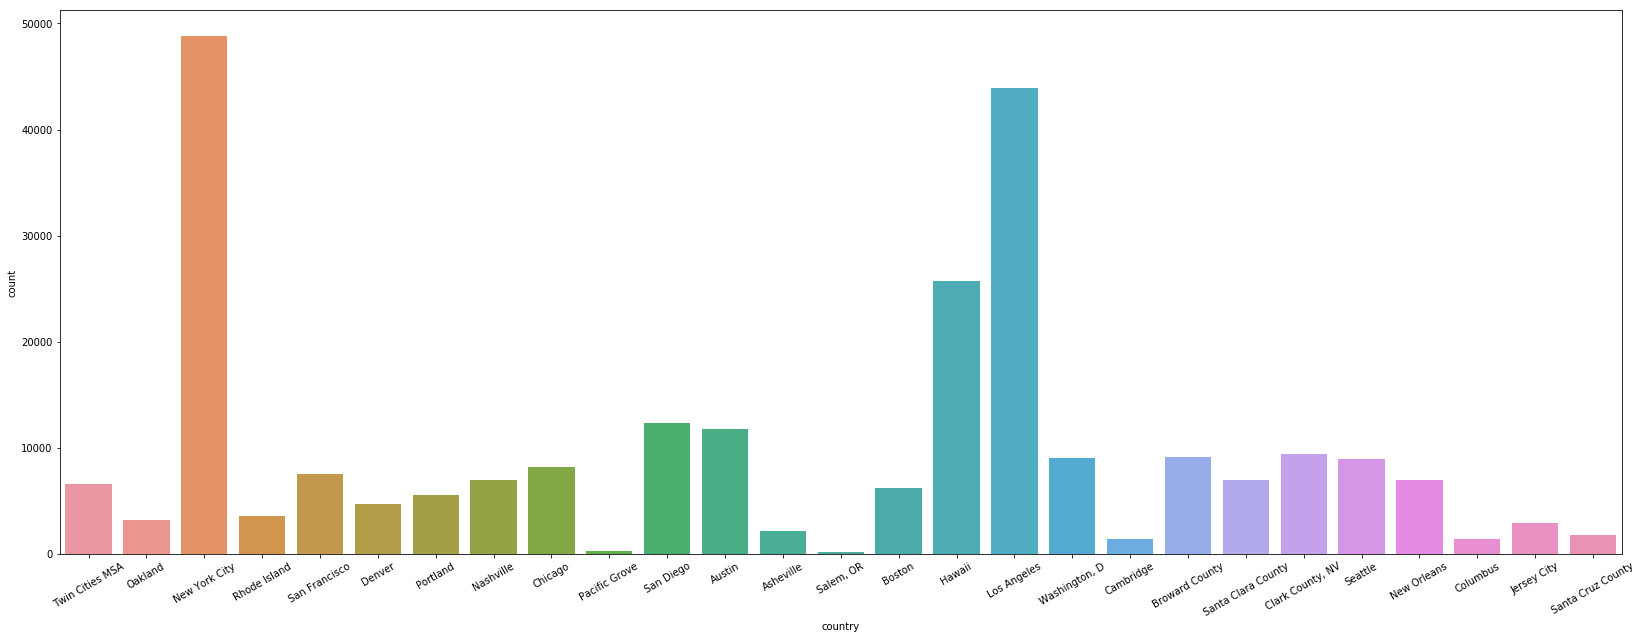

In [34]:
# https://seaborn.pydata.org/api.html
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(28, 10))
g = sns.countplot(x=total_df["country"])
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.savefig("country.png")
g

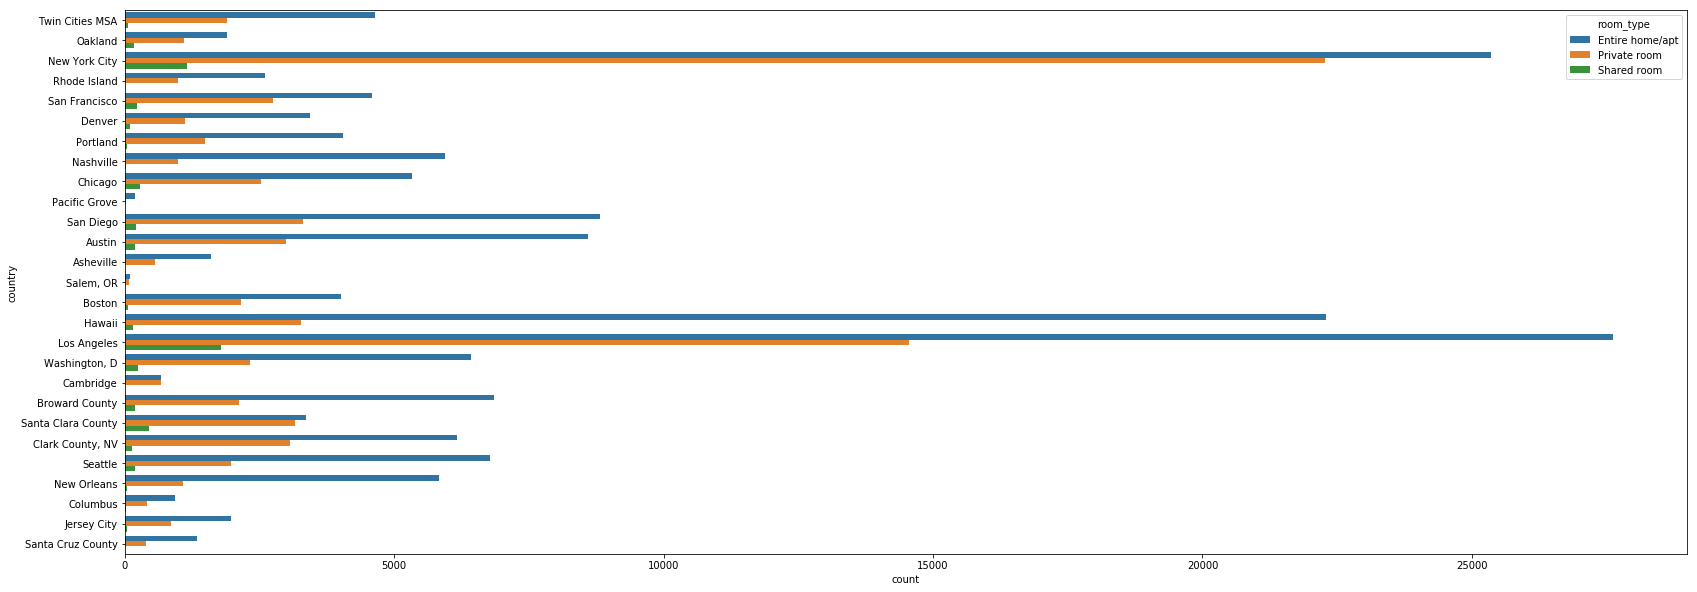

In [36]:
plt.figure(figsize=(28, 10))
sns.countplot(y=total_df["country"], hue=total_df["room_type"])
plt.savefig("country.png")


In [40]:
total_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'country'],
      dtype='object')

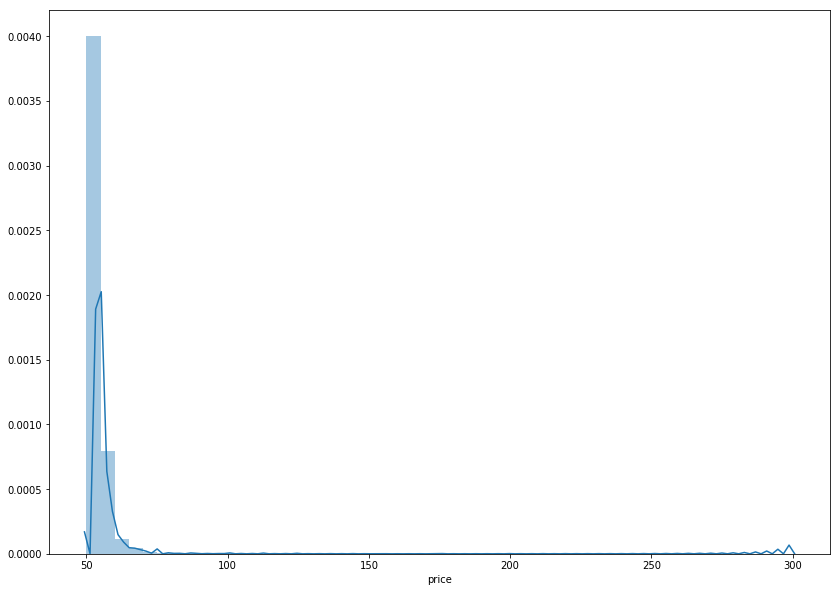

In [51]:
# Series: 比較 & 相等, 擴充到每一個
# 篩選: df[跟你的資料筆數依樣多的Ture/False]
plt.figure(figsize=(14, 10))
fs = total_df["country"] == "New York City"
ny_df = total_df[fs]
g = sns.distplot(ny_df["price"])
g.set_xticklabels(range(0, 10000, 50))
g

In [56]:
!pip install rake-nltk
# https://github.com/csurfer/rake-nltk
from rake_nltk import Rake
# .iloc: ["first row", "second row"]
s = total_df.iloc[0]["name"]

r = Rake()
r.extract_keywords_from_text(s)
r.get_ranked_phrases()

['cozy artist ’', 'entire home', 'wifi', 'netflix', 'abode']

In [63]:
# 整行轉換: apply
def phrase(s):
    r = Rake()
    r.extract_keywords_from_text(s)
    return str(r.get_ranked_phrases())
# head: 拿出頭幾列
# astype: 把整行轉換某個型態
df10000 = total_df.head(10000)
df10000["phrases"] = df10000["name"].astype("str").apply(phrase)
df10000.to_csv("df10000.csv", encoding="utf-8", index=False)
df10000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,country,phrases
0,2441,"Cozy Artist’s Abode, ENTIRE Home-Wifi,NetFlix +",2680,Emily,NaN,Hennepin,45.00886,-93.23407,Entire home/apt,85,2,212,2019-02-28,1.81,2,165,Twin Cities MSA,"['cozy artist ’', 'entire home', 'wifi', 'netf..."
1,4534,"Charming, 1 or 2BR + private bath, near downtown",5811,Rachel,NaN,Hennepin,44.94566,-93.35721,Private room,54,2,150,2019-04-24,1.37,1,363,Twin Cities MSA,"['private bath', 'near downtown', 'charming', ..."
2,27319,"Parks, Lakes, Downtown, Light rail",117283,Keith,NaN,Hennepin,44.91878,-93.23038,Private room,54,2,166,2019-05-05,1.57,2,341,Twin Cities MSA,"['light rail', 'parks', 'lakes', 'downtown']"
3,55089,"Minneapolis/Edina ""Cabin"" on Creek",238546,Leslie,NaN,Hennepin,44.92053,-93.35049,Entire home/apt,150,2,26,2018-11-26,0.31,2,335,Twin Cities MSA,"['minneapolis', 'edina', 'creek', 'cabin']"
4,60977,Attic Loft with organic breakfast,294621,Habib,NaN,Ramsey,44.94800,-93.19037,Entire home/apt,65,3,20,2016-08-07,0.21,1,0,Twin Cities MSA,"['organic breakfast', 'attic loft']"
5,67872,MPLS Metro Lakeside Summer Rental,209634,Mike And Maria,NaN,Washington,45.05694,-92.96061,Entire home/apt,385,14,2,2012-07-22,0.02,2,365,Twin Cities MSA,['mpls metro lakeside summer rental']
6,68981,Guest Room,111098,Justin,NaN,Hennepin,44.90730,-93.31865,Private room,170,1,0,NaN,NaN,1,365,Twin Cities MSA,['guest room']
7,82439,Rest and Rehearsal Space,117283,Keith,NaN,Hennepin,44.92136,-93.22873,Private room,54,2,15,2018-09-14,0.16,2,340,Twin Cities MSA,"['rehearsal space', 'rest']"
8,101034,★ParkFront ★ Walk 2 Downtown ★ Bike Score 98★,529956,MPLSvr Angie,NaN,Hennepin,44.98773,-93.25060,Entire home/apt,457,1,88,2019-03-30,1.04,9,261,Twin Cities MSA,['★ parkfront ★ walk 2 downtown ★ bike score 9...
9,101076,Minneapolis Gem of a Duplex,529956,MPLSvr Angie,NaN,Hennepin,44.98763,-93.21948,Entire home/apt,89,30,1,2011-08-30,0.01,9,283,Twin Cities MSA,"['minneapolis gem', 'duplex']"
